# TSF - GRIP - Data Science and Business Analytics Internship
   <b> 
Intern : Harshil Deepak Patel

Task3 - Exploratory Data Analysis - Retail
    
    
Problem Statement - Work as a business manager and find out areas where you can work to make more profit using exploratory data analysis on dataset sampleSuperstore. Also find out the business problems you can derive by exploring the data.
        <b>

Step1 - Importing libraries and dataset
Step2 - Checking for null and duplicated values in dataset
Step3 - Plotting correlatiob between data
Step4 - Finding sub-categories in data and representing them via pie and block graphs
Step5 - Classification of categories and plotting profits according to them
Step6 - Conclusion
Dataset - https://bit.ly/3i4rbWl

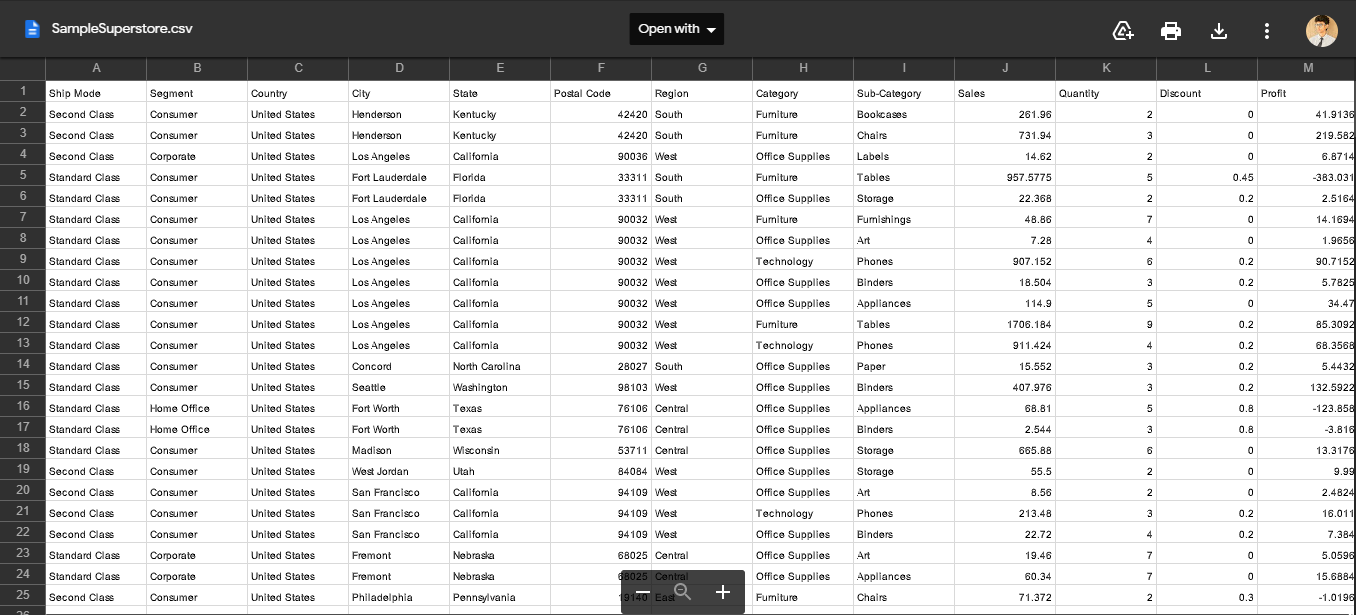

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv(r'C:\Users\harshil\Desktop\SEM7\Pandemic work\TSF\SampleSuperstore.csv')

In [3]:
data.head(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
data.describe()
#Note that the mean profit here is 28.6

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
data.info()
#We can perform similar operations on dataset for finding columns, shape, tail values, etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
#Checking for null and duplicated values now
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [7]:
data.duplicated().sum()

17

In [8]:
data.drop_duplicates(subset = None, inplace = True)
data.duplicated().sum()
#Thus we have removed the duplicate values

0

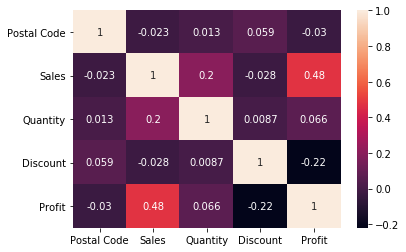

In [9]:
corr = data.corr()
sns.heatmap(corr, annot = True)
#Using heatmaps in seaborn to find correlation between data
#We can use different colors to visaluize this data using 'cmap' attribute

In [10]:
data = data.drop(['Postal Code'], axis = 1)
#This is done as postal code does not impact the business in a major way, we have done region and state based analysis instead 

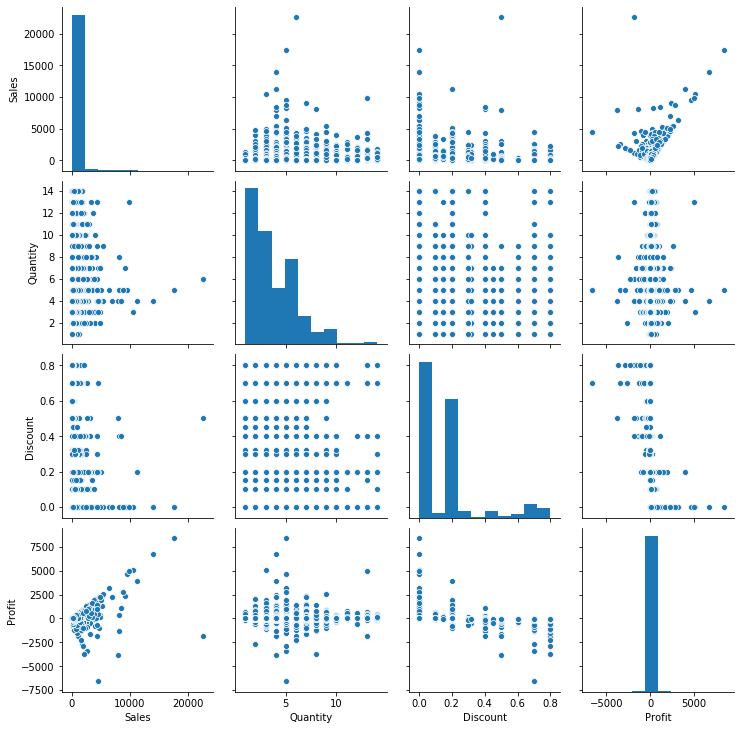

In [11]:
sns.pairplot(data)
#Using pairplot, we get an overall graphical representation of vital data i.e. sales, quantity, discount and profit
#Remember that being a business manager, we have to find ways to maximize profit
#We can use attribute 'hue' for pairplot to get better look at data

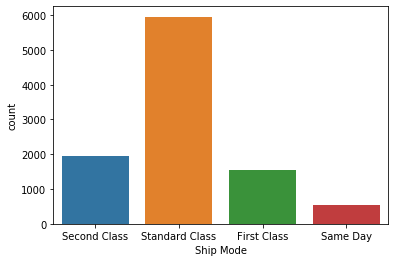

In [14]:
data['Ship Mode'].value_counts()
sns.countplot(x = data['Ship Mode'])
data['Segment'].value_counts()
sns.countplot(x = data['Segment'])
data['Category'].value_counts()
sns.countplot(x = data['Category'])
#This also gives us an interesting and interpretative look to increase profits

In [15]:
data['Sub-Category'].value_counts()

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

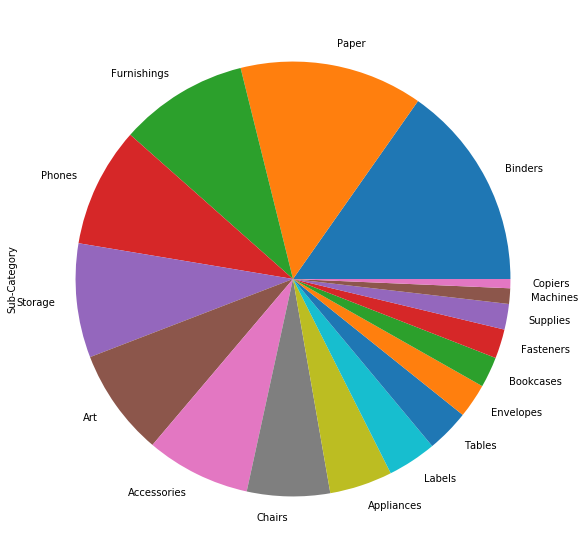

In [16]:
plt.figure(figsize=(10,10))
data['Sub-Category'].value_counts().plot.pie()
plt.show()

In [17]:
data['State'].value_counts()

California              1996
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Virginia                 224
Arizona                  224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
South Carolina            42
Louisiana                 42
Nevada        

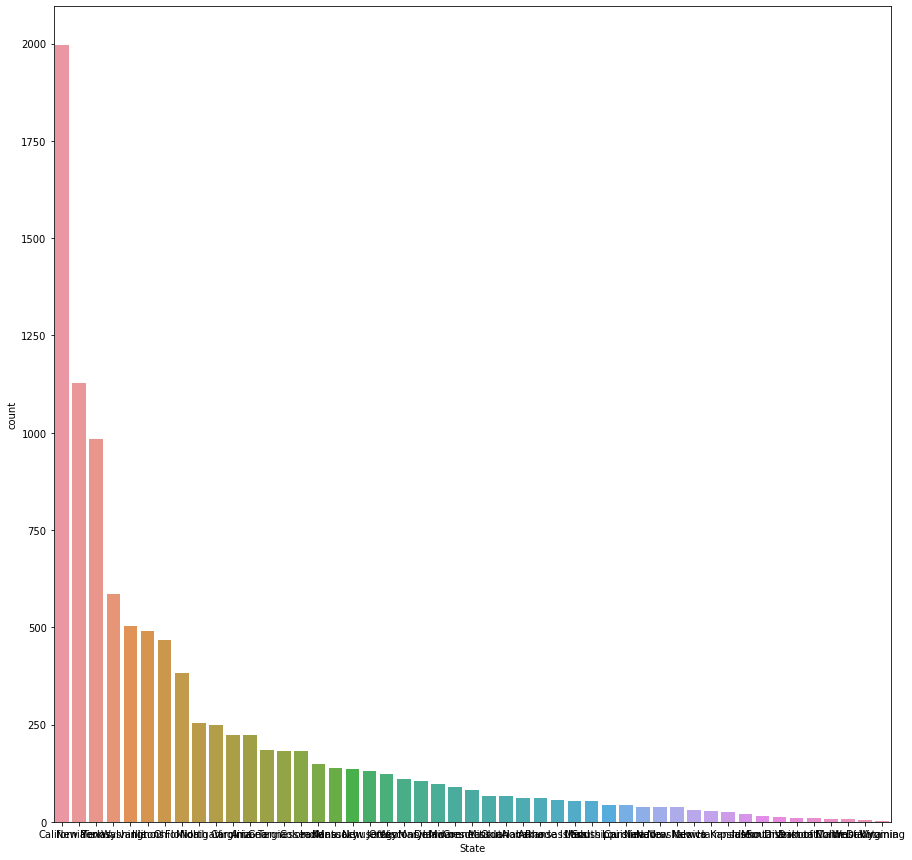

In [19]:
plt.figure(figsize=(15,15))
sns.countplot(x = 'State', data = data, order = data['State'].value_counts().index)
plt.show()
#This, we can make the observation that most buyers are from 2 states: California and Newyork

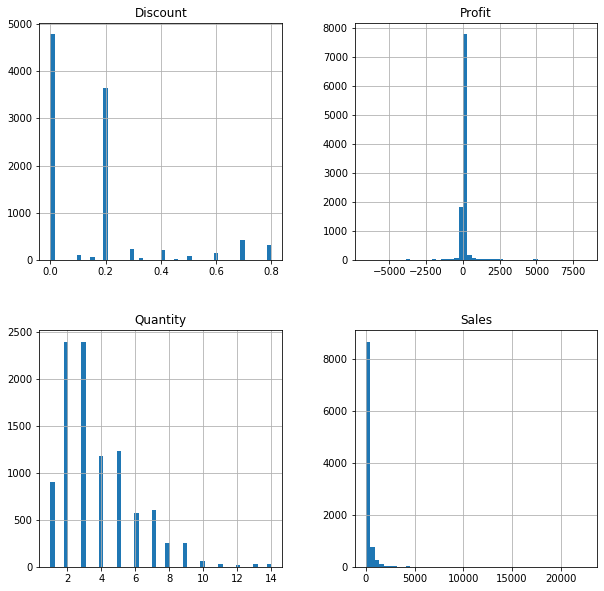

In [21]:
data.hist(figsize = (10,10), bins = 50)
plt.show()
#Another observation that can be made here is customers tend to buy quantity 2 and 3 more than others 
#Discount given ranges from 0 to 20%

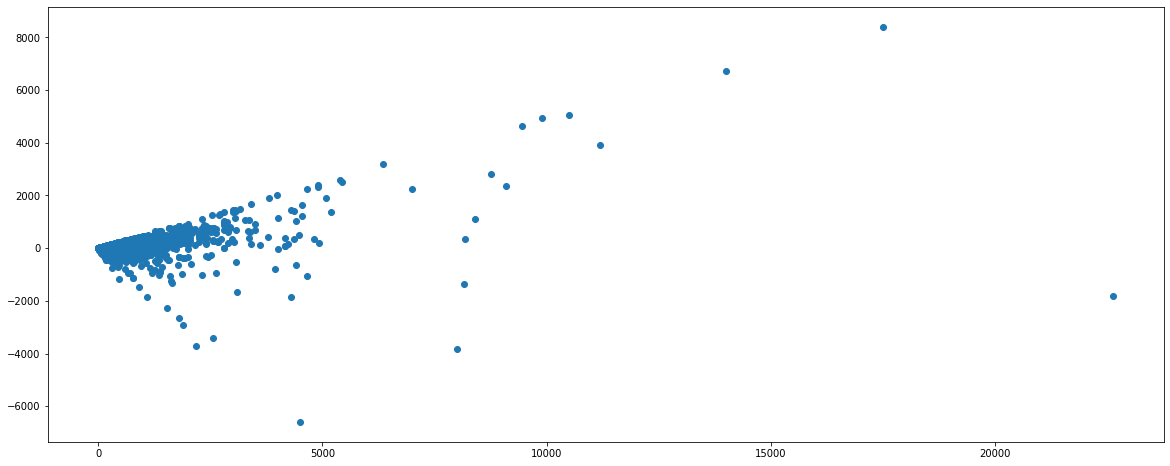

In [22]:
fig, ax = plt.subplots(figsize = (20,8))
ax.scatter(data['Sales'], data['Profit'])
plt.show()
#Plotting sales vs profit using scatter subplot

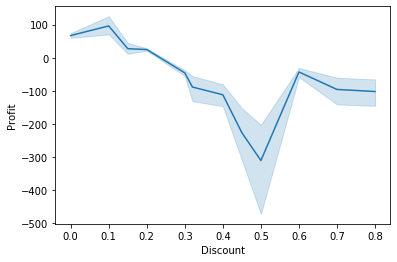

In [23]:
sns.lineplot(x = 'Discount', y = 'Profit', data = data)
plt.show()
#Using lineplot for plotting discount vs profit

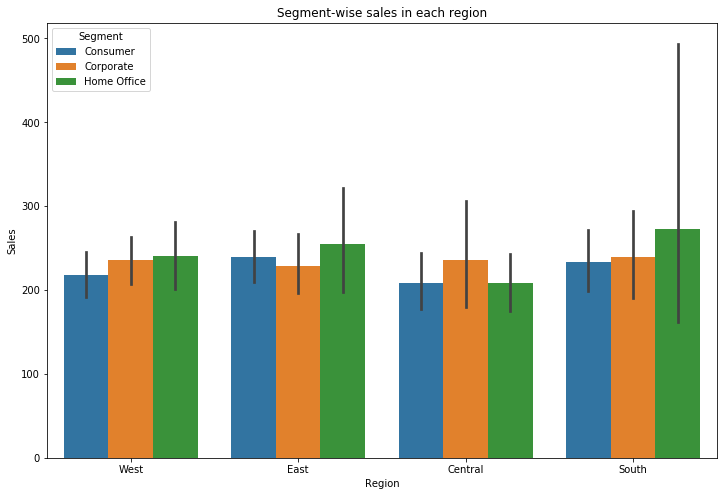

In [25]:
plt.figure(figsize = (12,8))
sns.barplot(x = 'Region', y ='Sales', data = data, hue = 'Segment', order = data['Region'].value_counts().index)
plt.title('Segment-wise sales in each region')
plt.show()
#An important observation we make here is that profit and sales are maximum in 'consumer' and minimum in 'home office' segments
#Also, profit and sales are maximum in west region and minimum in south region

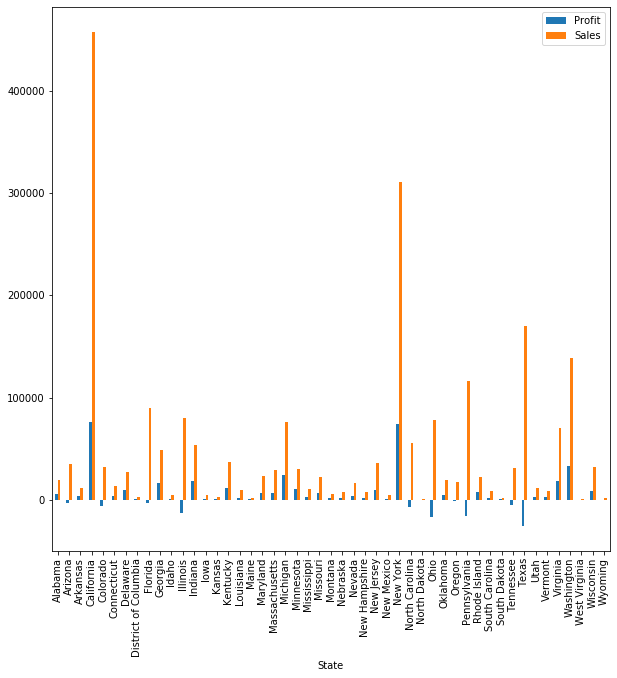

In [29]:
swpl = data['State'].value_counts().nlargest(10)
swpl #Here, swpl stands for State wise profit and loss
data.groupby('State')[['Profit','Sales']].sum().plot.bar(figsize = (10,10))
#Output shows us that bussiness gains highest profit in California and Newyork and suffers losses in Texas, Ohio & Pennsylvania

# Conclusion

<b>The task was to perform exploratory analysis on a dataset of a sample superstore and act as a Business Manager to find out the problems faced. We used different kinds of plots and representations of data using multiple attributes. We made multiple observations based on this analysis. 

    
The problems faced by the business are as follows:
    
1.Furniture fails to generate adequate amount of profit
    
2.The business suffers losses in three major states: Texas, Pennsylvania and Ohio
    
3.Profits generated in East and South region aren't adequate
    
4.Segment wise sales are almost the same
    
5.Most customers buy quantity of 2 and 3 so discount given on those items must be in such a way that profit goes up
    
6.Ensure that shipping mode category - standard class is most used by customers hence costs must be set in a way that profit goes up
    <b>